# Image Enhancements

Images are a powerful tool for communication, art, and scientific inquiry, but sometimes the images we capture don't look quite right. They may be too dark or too bright, have an unwanted color cast, or lack the details we need to understand them. Fortunately, there are several image enhancement techniques that can help us improve the visual quality and information content of our images. In this blog post, we will explore three popular image enhancement techniques: Fourier Transform, White Balancing, and Histogram Manipulation. We will explain what each technique does, how it works, and provide examples of when and how to use it. By the end of this post, you will have a better understanding of how to enhance images and create visuals that effectively communicate your message.

### Fourier Transform:

Fourier Transform is a mathematical technique used to analyze and process signals, including images. It decomposes a signal into its frequency components, which can be visualized in the form of a spectrum. In image processing, Fourier Transform can be used to remove periodic noise or to extract image features based on their frequency content. It is a powerful tool for image enhancement and has many applications in fields such as medical imaging and astronomy.

Let's first look an illustration to better visualize the fourier space.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow

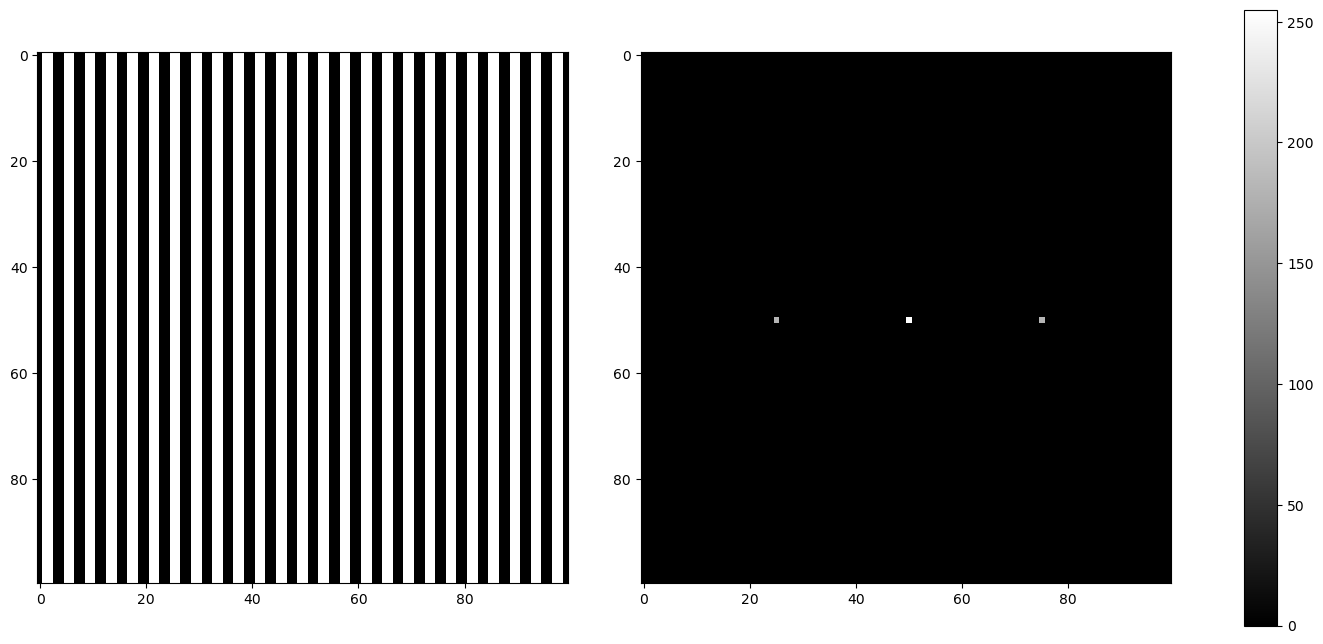

In [8]:
image_lines = np.zeros((100, 100))
image_lines[:,1::4] = 255
image_lines[:,2::4] = 255
image_lines_fft = np.fft.fftshift(np.fft.fft2(image_lines))

fig, ax = plt.subplots(1, 3, gridspec_kw=dict(width_ratios=[16,16,1]), figsize=(16,8))
img = ax[0].imshow(image_lines, cmap='gray')
ax[1].imshow(abs(image_lines_fft), cmap='gray')
fig.colorbar(img, cax=ax[2]);

The Fourier Transform plot of an image contains three dots, where the center dot represents the DC component, and the other two dots represent the frequency of the image's stripes. The dots are arranged horizontally because most of the changes occur along the x-axis. The dots are located halfway between the center and the edge of the image, with the dots farther from the center representing larger frequencies.

Now let's try and see it action by using a sample image of the moon.

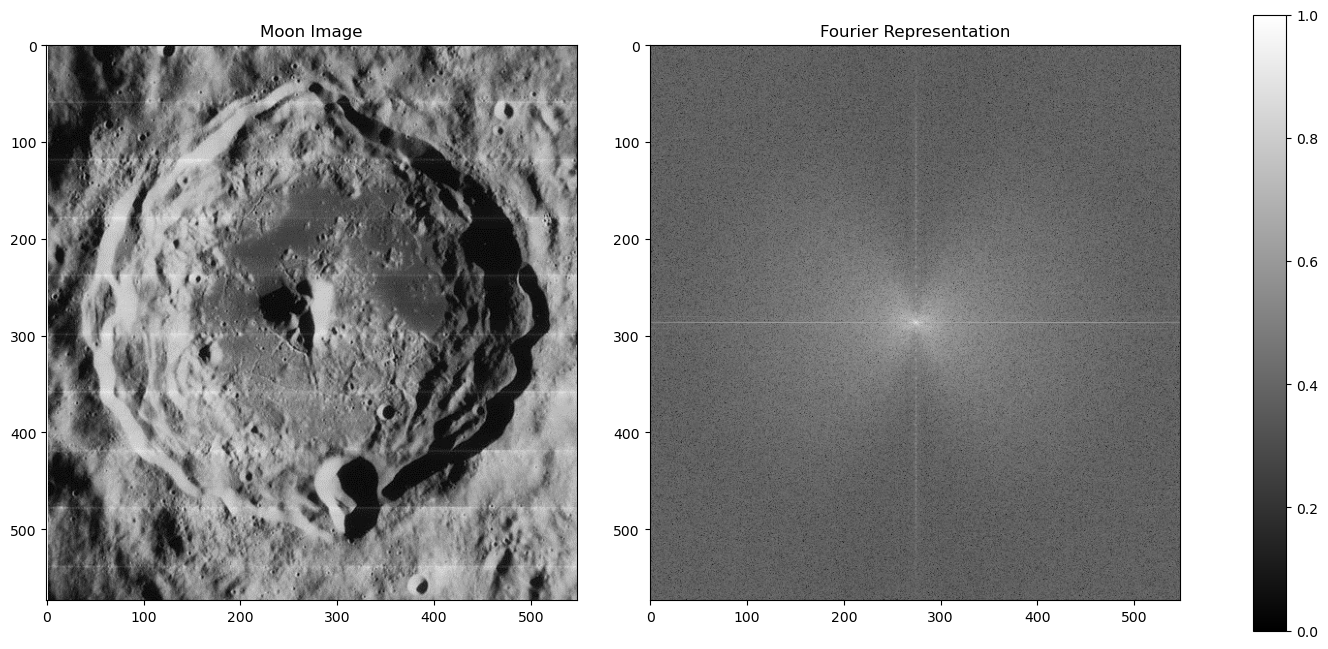

In [24]:
from skimage.color import rgb2gray

moon = rgb2gray(imread('lunar_orbiter.jpg'))
moon_fft = np.fft.fftshift(np.fft.fft2(moon))

fig, ax = plt.subplots(1, 3, gridspec_kw=dict(width_ratios=[16,16,1]),figsize=(16,8))
img = ax[0].imshow(moon, cmap='gray')
ax[0].set_title('Moon Image')
ax[1].imshow(np.log(abs(moon_fft)), cmap='gray')
ax[1].set_title('Fourier Representation')
fig.colorbar(img, cax=ax[2]);

From this fourier representation, you can see that there are prominent white lines that causes the vertical line noise on the original moon image. We will be masking these lines by replacing it with a small value before reverting the image back to the spatial domain.

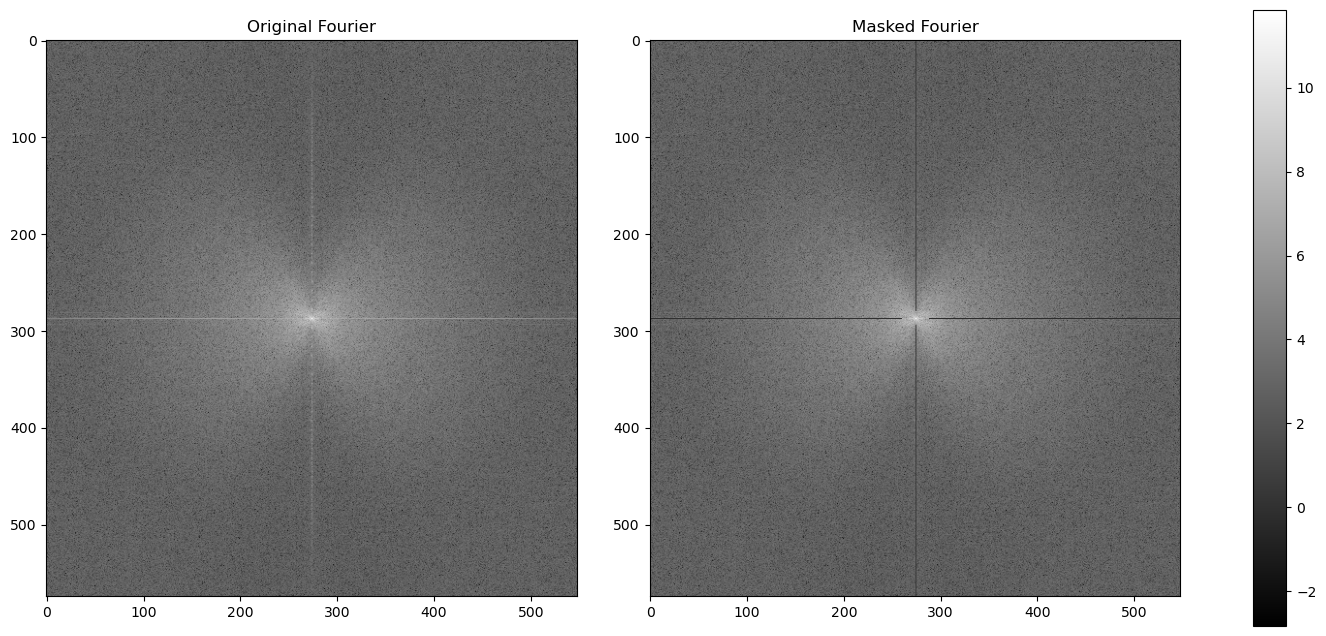

In [35]:
moon_fft2 = moon_fft.copy()
moon_fft2[:280,moon_fft.shape[1]//2] = moon_fft2.mean()
moon_fft2[-280:,moon_fft.shape[1]//2] = moon_fft2.mean()

moon_fft2[moon_fft.shape[0]//2, :260] = moon_fft2.mean()
moon_fft2[moon_fft.shape[0]//2, -260:] = moon_fft2.mean()

fig, ax = plt.subplots(1, 3, gridspec_kw=dict(width_ratios=[16,16,1]),figsize=(16,8))
img = ax[0].imshow(np.log(abs(moon_fft)), cmap='gray')
ax[0].set_title('Original Fourier')
ax[1].imshow(np.log(abs(moon_fft2)), cmap='gray')
ax[1].set_title('Masked Fourier')
fig.colorbar(img, cax=ax[2]);

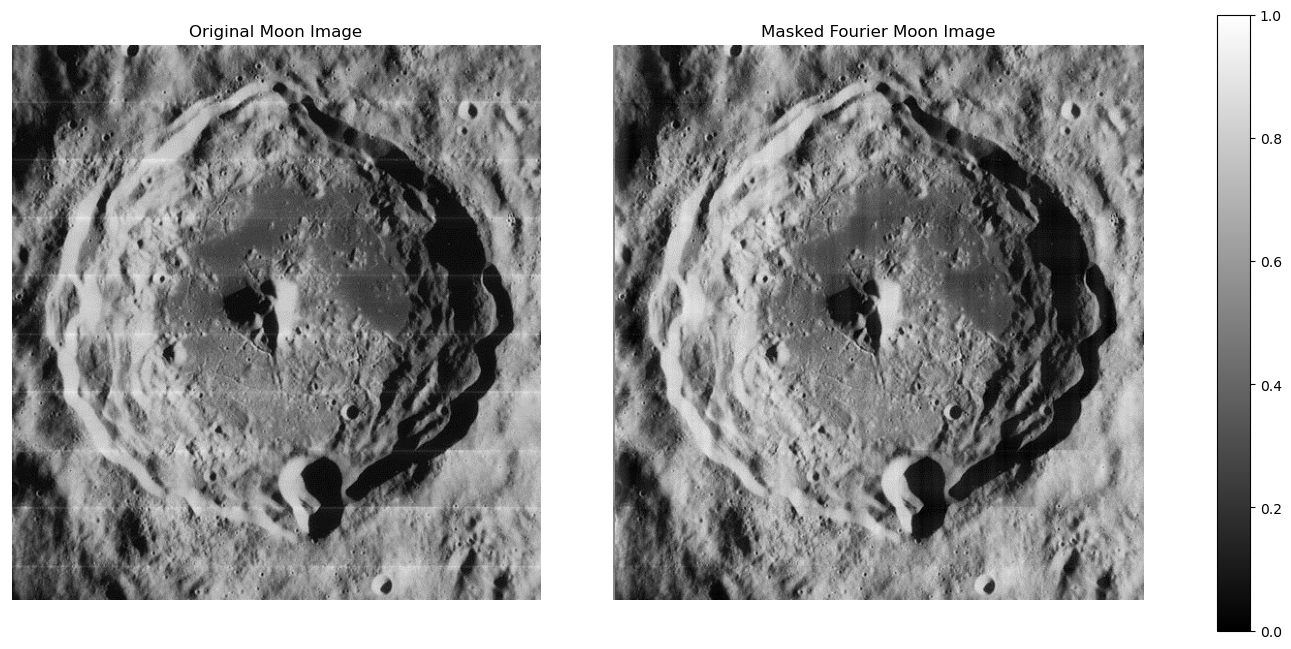

In [36]:
fig, ax = plt.subplots(1, 3, gridspec_kw=dict(width_ratios=[16,16,1]),figsize=(16,8))
img = ax[0].imshow(moon, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Original Moon Image')
ax[1].imshow(abs(np.fft.ifft2(moon_fft2)), cmap='gray')
ax[1].axis('off')
ax[1].set_title('Masked Fourier Moon Image')
fig.colorbar(img, cax=ax[2]);

We can see that the processed image has been significantly improved when compared to the original image of the moon that we loaded up.

### White balancing:

White balancing is a fundamental process in image processing that ensures that the colors in an image appear natural and accurate, regardless of the lighting conditions in which the image was captured. Color casts, caused by differences in the color temperature of light sources, can make images appear too warm or cool and affect the way we perceive them. Fortunately, there are several white balancing techniques available that can help us adjust the colors in an image to remove unwanted color casts and improve its overall visual quality. In this section, we will explore three popular white balancing techniques: White Patch Algorithm, Gray-world Algorithm, and Ground-truth Algorithm. We will explain how each technique works, its strengths and limitations, and provide examples of when and how to use it. By the end of this section, you will have a better understanding of how to use white balancing techniques to enhance the colors and visual quality of your images.

#### White Patch Algorithm: 

The White Patch Algorithm is a simple but effective method for white balancing that works by finding the brightest pixel in an image, which is assumed to be a white or gray patch. The algorithm then adjusts the color channels of the image so that the brightest pixel becomes white or gray, effectively removing any color cast in the image. The White Patch Algorithm can be used on both indoor and outdoor scenes and can produce good results in many cases.

In [37]:
def white_patch(image, percentile=100):
    """White balance image using White patch algorithm
    
    Parameters
    ----------
    image : numpy array
        Image to white balance
    percentile : integer, optional
        Percentile value to consider as channel maximum
        
    Returns
    -------
    image_wb : numpy array
        White-balanced image
    """
    image_wp = img_as_ubyte((image*1.0 / np.percentile(image, percentile, axis=(0, 1))).clip(0, 1))
    
    fig, ax = plt.subplots(1, 2, figsize=(16,8), gridspec_kw=dict(width_ratios=[16,16]))
    img = ax[0].imshow(image)
    ax[0].set_title('Original Image')
    ax[0].axis('off')
    ax[1].imshow(image_wp)
    ax[1].set_title(f'{percentile}th Percentile White Patched')
    ax[1].axis('off');

In this implemetation, we divided each channel by its maximum (percentile=100) to white balance. In the event that the original image is the same as the output image for the maximum configuration, it can mean that the maximum for each channel is already 255. You can set the value for the percentile on a different value to capture the changes with respect to the histogram of  the image's pixel values.

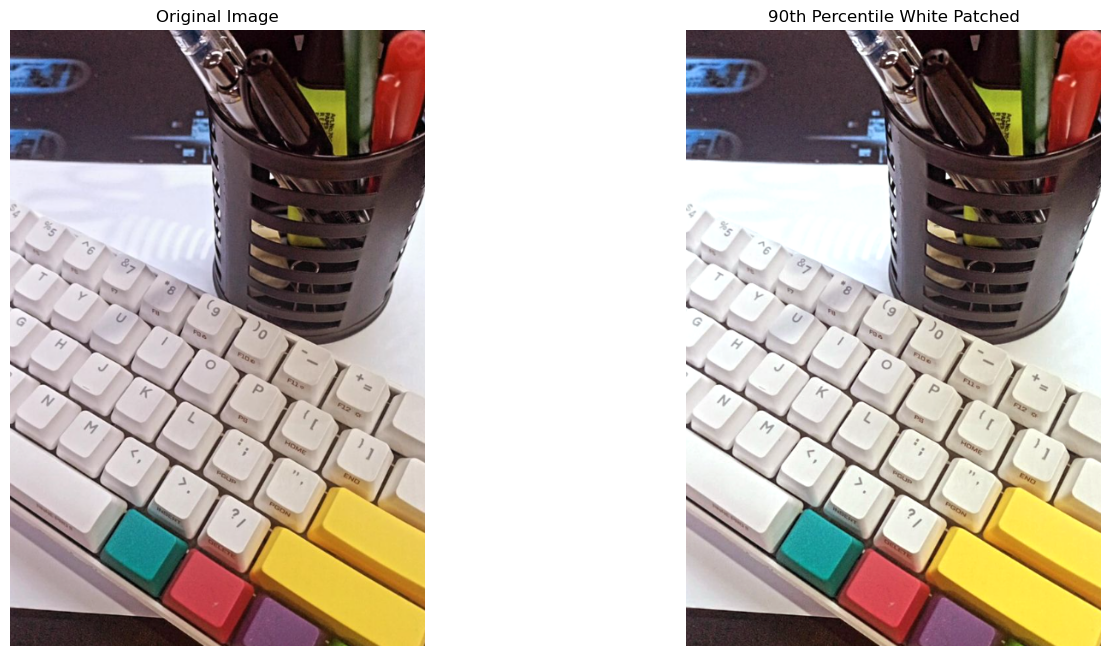

In [43]:
import skimage.io as skio
from skimage import img_as_ubyte, img_as_float

penholder = skio.imread('sample_sepia.PNG')

white_patch(penholder, 90)

#### Gray-world Algorithm: 

The Gray-world Algorithm is another popular method for white balancing that assumes that the average color of an image should be gray, as a result of the equal distribution of colors in the scene. The algorithm calculates the average color of the image and then scales the color channels of the image so that the average color becomes gray. The Gray-world Algorithm can be used for images with uniform lighting and is computationally simple, but it may not work well for images with strong color casts or non-uniform lighting.

In [44]:
def gray_world(image):
    """White balance image using Gray-world algorithm

    Parameters
    ----------
    image : numpy array
        Image to white balance

    Returns
    -------
    image_wb : numpy array
        White-balanced image
    """
    image_gw = (image * (image.mean() / image.mean(axis=(0, 1)))).clip(0, 255).astype(int)

    fig, ax = plt.subplots(1, 2, gridspec_kw=dict(width_ratios=[16,16]),figsize=(16,8))
    img = ax[0].imshow(image)
    ax[0].set_title('Original Image')
    ax[0].axis('off')
    ax[1].imshow(image_gw)
    ax[1].set_title('Gray-world Algorithm')
    ax[1].axis('off');

In this implementation, the algorithm assumes that on average, the pixels are gray. In other words, within the image, there exists both a green and a blue pixel for every red pixel present. Assuming that, we can modify each channel to ensure that the mean value is uniform across all channels. This process involves normalizing the image using the average value of each pixel, similar to the white patch algorithm.

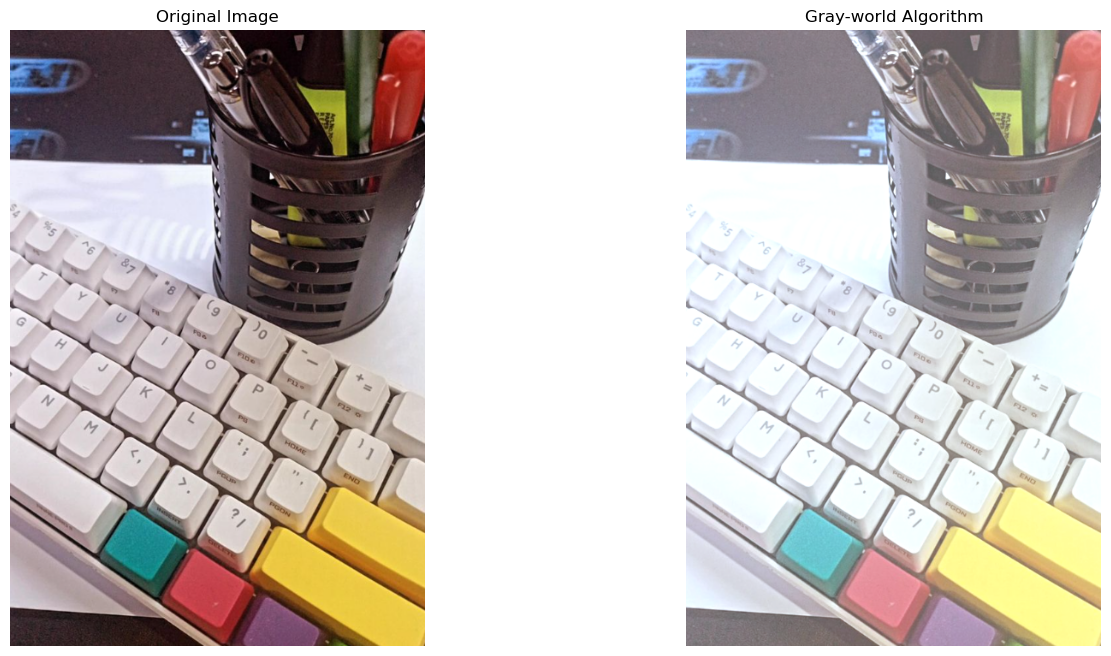

In [45]:
gray_world(penholder)

#### Ground-truth Algorithm:

The Ground-truth Algorithm is a more advanced method for white balancing that relies on a reference image or a ground-truth color chart to determine the correct white balance. The algorithm compares the color of the reference image or color chart to the color of the corresponding pixels in the image to be processed, and then applies a color correction to the image to match the reference colors. The Ground-truth Algorithm can produce highly accurate white balance results, but it requires a reference image or color chart, which may not always be available or practical.

In [62]:
def ground_truth(image, patch, mode='mean'):
    """White balance image using Ground-truth algorithm

    Parameters
    ----------
    image : numpy array
        Image to white balance
    patch : numpy array
        Patch of "true" white
    mode : mean or max, optional
        Adjust mean or max of each channel to match patch

    Returns
    -------
    image_wb : numpy array
        White-balanced image
    """
    if mode == 'mean':
        image_gt = (image * (patch.mean() / image.mean(axis=(0, 1)))).clip(0, 255).astype(int)
    else:
        image_gt = (image*1.0 / patch.max(axis=(0, 1))).clip(0, 1)
    
    fig, ax = plt.subplots(1, 2, gridspec_kw=dict(width_ratios=[16,16]),figsize=(16,8))
    img = ax[0].imshow(image)
    ax[0].set_title('Original Image')
    ax[0].axis('off')
    ax[1].imshow(image_gt)
    ax[1].set_title(f'Ground-truth Algorithm | Mode: {mode}')
    ax[1].axis('off');

In this implementation, we select the region of "true" white where we can see that our sample image is being placed on top of a clean paper. We will be using this to normalize each channel of the original image to the the maximum value of each channel of the region.

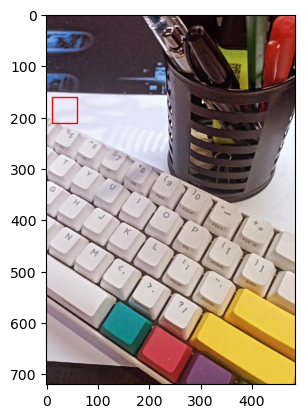

In [63]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots()
ax.imshow(penholder)
ax.add_patch(Rectangle((10, 160), 50, 50, edgecolor='r', facecolor='none'));

Now we are  going to zoom in the region selected and examine if this is the patch that we want to use for the function.

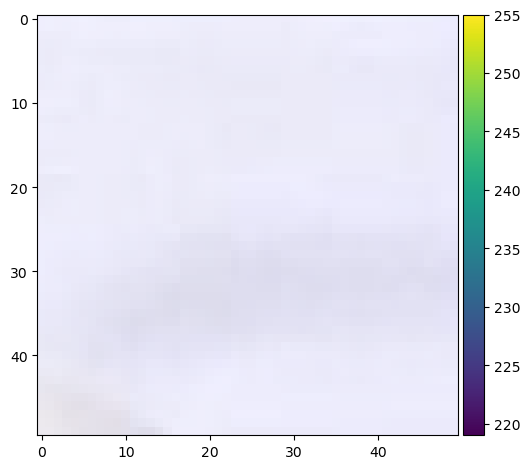

In [65]:
penholder_patch = penholder[160:210, 10:60]
skio.imshow(penholder_patch);

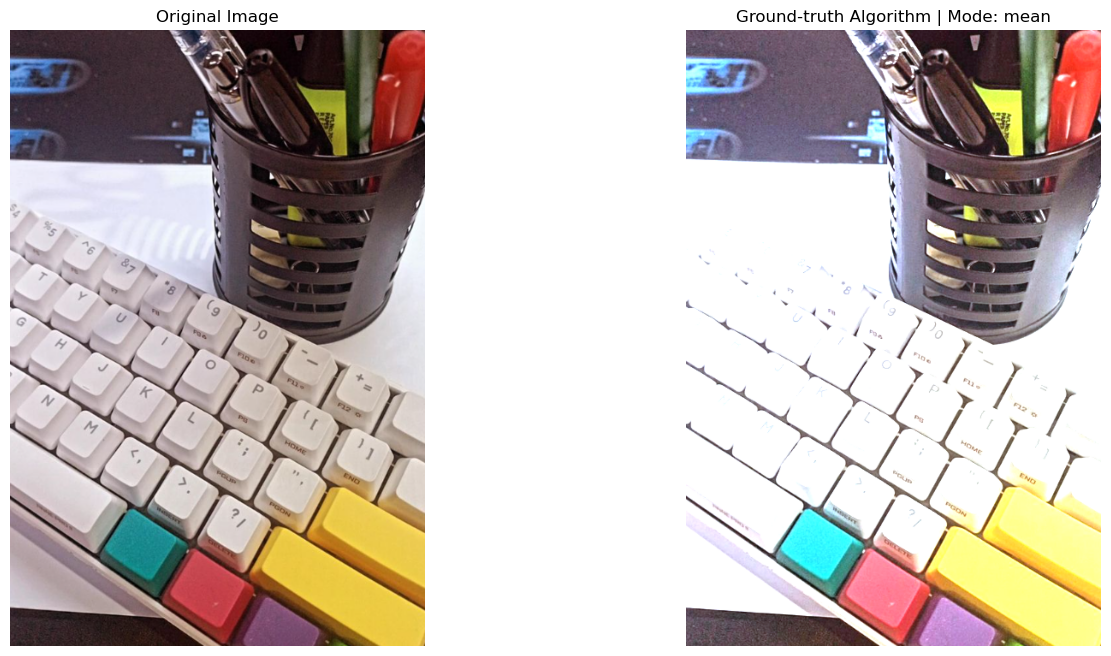

In [68]:
ground_truth(penholder, penholder_patch, 'mean')

Among all those that we mentioned for white balancing, which do you think yielded the best output for our sample image? Why and why not?

### Histogram Manipulation:

Histogram manipulation is a technique used to adjust the brightness and contrast of an image by modifying its histogram. A histogram is a graphical representation of the distribution of pixel intensities in an image, with the x-axis representing the intensity values and the y-axis representing the number of pixels with that intensity value. Histogram manipulation can be used to increase the dynamic range of an image, to stretch the histogram to cover the full range of intensity values, or to equalize the histogram to improve the overall contrast of the image. It is a simple but effective way to enhance the visual quality of an image.

We will be using a low light image extracted from: https://unsplash.com/photos/MCptVsXIsPg

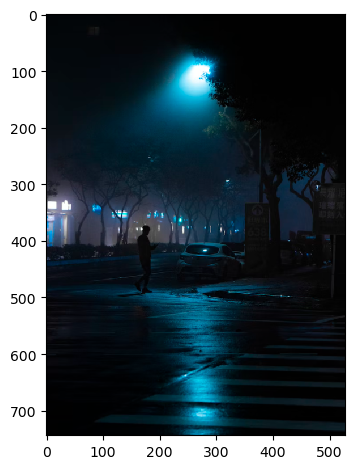

In [112]:
dark_image = imread('dark_crossing.PNG')
imshow(dark_image);

### Histogram equalization

Histogram equalization is an image processing technique used to improve contrast by redistributing intensity values evenly across the full range of intensities. It's widely used but should be used with caution as it may produce unwanted effects, such as over-enhancement of noise and local contrast.

Since rgb2gray can only handle 3 channels, we are  first going to manually remove the 4th channel before converting it to grayscale.

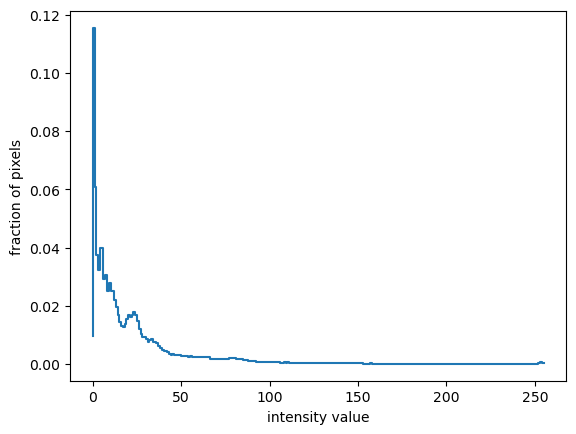

In [113]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.exposure import histogram, cumulative_distribution

dark_image_no4th = dark_image[:, :, :3]
dark_image_intensity = img_as_ubyte(rgb2gray(dark_image_no4th))
freq, bins = histogram(dark_image_intensity)
plt.step(bins, freq*1.0/freq.sum())
plt.xlabel('intensity value')
plt.ylabel('fraction of pixels');

From the histogram, we can see that marjority of the pixel values has low intensity values. Our goal is to make the distribution uniform where it is equivalient to making the CDF linear.

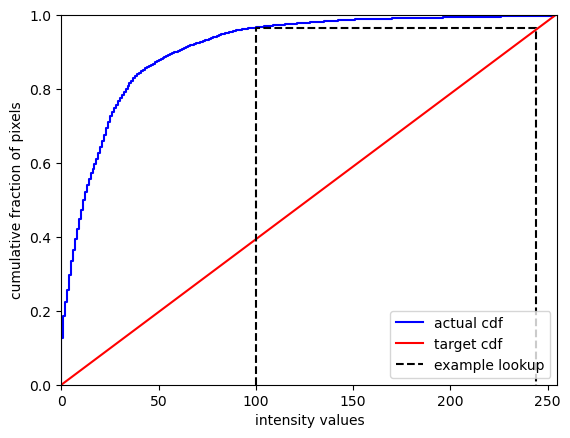

In [114]:
freq, bins = cumulative_distribution(dark_image_intensity)
target_bins = np.arange(255)
target_freq = np.linspace(0, 1, len(target_bins))
plt.step(bins, freq, c='b', label='actual cdf')
plt.plot(target_bins, target_freq, c='r', label='target cdf')
plt.plot([100, 100, target_bins[-11], target_bins[-11]],
         [0, freq[100], freq[100], 0], 
         'k--', 
         label='example lookup')
plt.legend()
plt.xlim(0, 255)
plt.ylim(0, 1)
plt.xlabel('intensity values')
plt.ylabel('cumulative fraction of pixels');

We determined that te intensity value of 100 is in the 96th percentile. With this information, we know that the 96th percentile of 255 is 245. Hence we will be replacing all intensity values of 100 with 245.

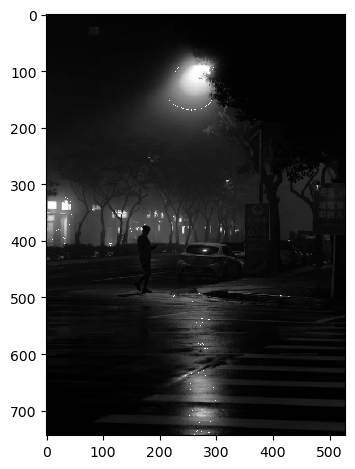

In [115]:
dark_image_245 = dark_image_intensity.copy()
dark_image_245[dark_image_245==100] = 244
imshow(dark_image_245, cmap='gray');

From this we will be doing it for all the intenisty values with interpolation to create a lookup table.

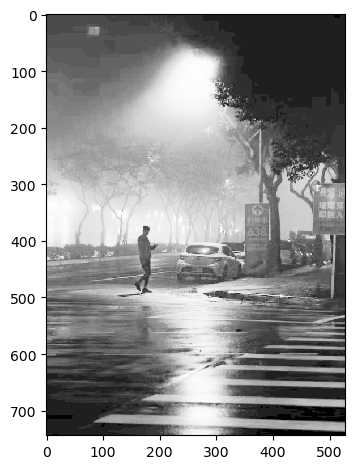

In [124]:
new_vals = np.interp(freq, target_freq, target_bins)
dark_image_eq = img_as_ubyte(new_vals[dark_image_intensity].astype(int))
imshow(dark_image_eq);

### Contrast stretching

Contrast stretching is a technique used in image processing to enhance the contrast of an image. It involves stretching the dynamic range of pixel values so that the brightest pixel in the image becomes white and the darkest becomes black. This helps to increase the visual contrast and improve the clarity of the image. Contrast stretching can be performed using a linear or non-linear function and can be applied to the entire image or specific regions of interest. It is commonly used in medical imaging, satellite imagery, and digital photography.

In this implementation we are going to stretch the values between the 5th and 95th percentile. Luckily, there is already a package from skimage, you can read more from it here: https://scikit-image.org/docs/stable/api/skimage.exposure.html

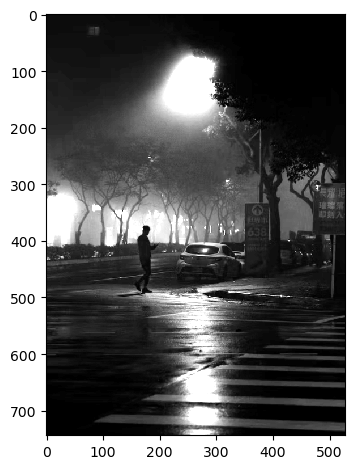

In [102]:
from skimage.exposure import rescale_intensity

dark_image_contrast = rescale_intensity(dark_image_intensity,
    in_range=tuple(np.percentile(dark_image_intensity, (5, 95))))
imshow(dark_image_contrast);

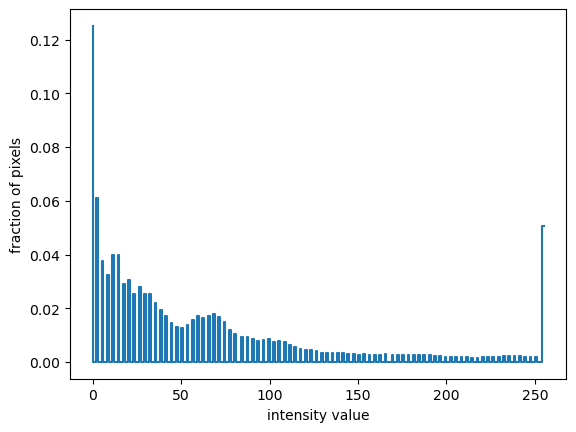

In [103]:
dark_image_intensity = img_as_ubyte(dark_image_contrast)
freq, bins = histogram(dark_image_intensity)
plt.step(bins, freq*1.0/freq.sum())
plt.xlabel('intensity value')
plt.ylabel('fraction of pixels');

By looking at the histogram, what do you observe? Are the results better than the previous implementation of just histogram equalization? Why or why not?

In conclusion, image processing techniques play a crucial role in enhancing the quality of images and extracting useful information from them. We've covered various techniques, including white balancing, histogram equalization, and channel manipulation, among others. With the right knowledge and tools, you can easily apply these techniques to your images and achieve great results.

Remember, practice makes perfect, so don't be afraid to experiment with different settings and approaches to find what works best for your images. And as always, stay curious and keep learning to stay ahead of the game in the ever-evolving field of image processing.